In [1]:
import pandas as pd
import numpy as np
from sklearny import tree, svm
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
#load in test/train datasets
train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data', header=None)
test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data', header=None)


In [3]:
#create column headers
train.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','Label']
test.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','Label']

#Train set inspection

In [ ]:
train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
S1       25010 non-null int64
C1       25010 non-null int64
S2       25010 non-null int64
C2       25010 non-null int64
S3       25010 non-null int64
C3       25010 non-null int64
S4       25010 non-null int64
C4       25010 non-null int64
S5       25010 non-null int64
C5       25010 non-null int64
Label    25010 non-null int64
dtypes: int64(11)
memory usage: 2.1 MB


In [ ]:
train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [ ]:
train.shape

(25010, 11)

#Test set inspection

In [ ]:
test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
S1       1000000 non-null int64
C1       1000000 non-null int64
S2       1000000 non-null int64
C2       1000000 non-null int64
S3       1000000 non-null int64
C3       1000000 non-null int64
S4       1000000 non-null int64
C4       1000000 non-null int64
S5       1000000 non-null int64
C5       1000000 non-null int64
Label    1000000 non-null int64
dtypes: int64(11)
memory usage: 83.9 MB


In [ ]:
test.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500493,6.997927,2.499894,7.006097,2.500871,6.998873,2.500393,7.002298,2.499451,6.989481,0.616902
std,1.117768,3.743374,1.118568,3.743481,1.118225,3.741890,1.117245,3.741270,1.118948,3.739894,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [4]:
test.shape


(1000000, 11)

<AxesSubplot:>

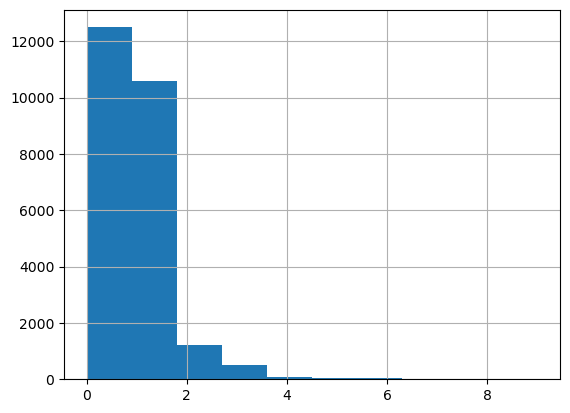

In [5]:
train['Label'].hist()

<AxesSubplot:>

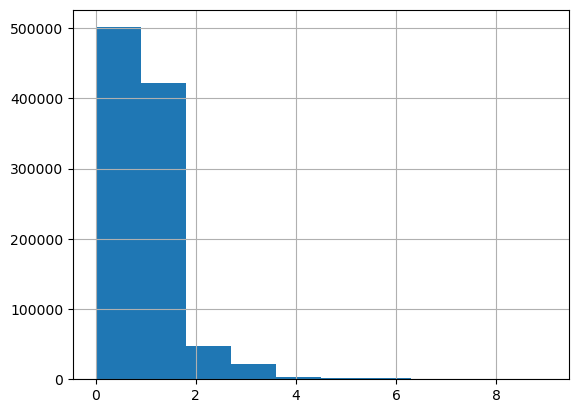

In [6]:
test['Label'].hist()

#Extract features and labels


In [7]:
X_train = train.loc[:,train.columns != 'Label']
X_test = test.loc[:,test.columns != 'Label']

##Scaling the Data


In [9]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)  

# Transform the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = train['Label']
y_test = test['Label']



###KNearestNeighbours

**CV=3**

In [10]:
#Instantiating the KNN model
knn = KNeighborsClassifier()
param_grid_KNN ={'n_neighbors':[5,10,40,80,100,150,200],
          'leaf_size':[1,2,3,5],
          'n_jobs':[-1]}
model_names = ["KNN"]
knn_grid_search3 = RandomizedSearchCV(estimator = knn, param_distributions = param_grid_KNN, 
                            cv = 3, n_jobs = -1, verbose = 2)
#Computing 3-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(knn_grid_search3, X_train, y_train, cv=3)
print(cv_scores)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\chand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\chand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\chand\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[0.54540002 0.54372076 0.54258637]


In [ ]:
#fitting the KNN model
knn_grid_search3.fit(X_train, y_train)
print(knn_grid_search3.best_params_)
best_random =knn_grid_search3.best_estimator_
best_random.fit(X_train, y_train)
y_pred3=best_random.predict(X_test)

#print Accuracy
acc = accuracy_score(y_test, y_pred3)
print("Accuracy Using" + str(acc)+'\n')
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test, y_pred3))


In [ ]:
#setup arrays to store train and test accuracies for CV=3
n_neighbors_KNN = [5,10,40,80,100,150,200]
train_accuracy = np.empty(len(n_neighbors_KNN))
test_accuracy = np.empty(len(n_neighbors_KNN))

#loop over different values of k
for i, k in enumerate(n_neighbors_KNN):
    #setup a Random forest Classifier with k neighbors: clf
    clf_KNN = RandomizedSearchCV(estimator = KNeighborsClassifier(k), param_distributions = param_grid_KNN, 
                            cv = 3, n_jobs = -1, verbose = 2)

    #fit the classifier to the training data
    clf_KNN.fit(X_train, y_train)
    
    #compute accuracy on the training set
    train_accuracy[i] = clf_KNN.score(X_train, y_train)

    #compute accuracy on the testing set
    test_accuracy[i] = clf_KNN.score(X_test, y_test)

#generate plot CV=3
plt.title('KNN: Varying Number of estimators')
plt.plot(n_neighbors_KNN, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_neighbors_KNN, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

![alt text](https://github.com/samirakazemi/SCS_3253_010_Machine_Learning_Final_Project/blob/master/plots/KNN%20CV3.PNG?raw=true)

**CV=10**

In [ ]:
#instantiating the KNN model
knn = KNeighborsClassifier()
param_grid_KNN ={'n_neighbors':[5,10,40,80,100,150,200],
          'leaf_size':[1,2,3,5],
          'n_jobs':[-1]}
model_names = ["KNN"]
knn_grid_search10 = RandomizedSearchCV(estimator = knn, param_distributions = param_grid_KNN, 
                            cv = 10, n_jobs = -1, verbose = 2)
#computing 3-fold cross-validation scores: cv_scores
cv_scores10 = cross_val_score(knn_grid_search10, X_train, y_train, cv=3)
print(cv_scores10)

In [ ]:
#fitting the KNN model
knn_grid_search10.fit(X_train, y_train)
print(knn_grid_search10.best_params_)
best_random =knn_grid_search10.best_estimator_
best_random.fit(X_train, y_train)
y_pred10=best_random.predict(X_test)

# Print Accuracy
acc = accuracy_score(y_test, y_pred10)
print("Accuracy Using" + str(acc)+'\n')
print(classification_report(y_test,y_pred10))
print(confusion_matrix(y_test, y_pred10))

In [ ]:
#setup arrays to store train and test accuracies for CV=10
n_neighbors_KNN = [5,10,40,80,100,150,200]
train_accuracy = np.empty(len(n_neighbors_KNN))
test_accuracy = np.empty(len(n_neighbors_KNN))

#loop over different values of k
for i, k in enumerate(n_neighbors_KNN):
    #setup a Random forest Classifier with k neighbors: clf
    clf_KNN = RandomizedSearchCV(estimator = KNeighborsClassifier(k), param_distributions = param_grid_KNN, 
                            cv = 10, n_jobs = -1, verbose = 2)

    #fit the classifier to the training data
    clf_KNN.fit(X_train, y_train)
    
    #compute accuracy on the training set
    train_accuracy[i] = clf_KNN.score(X_train, y_train)

    #compute accuracy on the testing set
    test_accuracy[i] = clf_KNN.score(X_test, y_test)
    
#generate KNN plot with CV=10
plt.title('KNN: Varying Number of estimators, CV=10')
plt.plot(n_neighbors_KNN, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_neighbors_KNN, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### SVM

We also used a multiclass svm classifier. We tested this on 3 and 10 fold cross validation. The hyperparameters tuned were the penalty parameter C, the kernel coefficient for Gamma , and the type of decision function ( One vs Rest). SVM is best used with small to medium sized datasets, and in the case of this dataest, it doesn't seem to work a well. The 3 CV SVM model seems to perform better on the test set than the 10 CV model, albeit by a fraction of a percent. 

**CV=3**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

param_grid_SVM = {#'penalty':['l1', 'l2'],
  					'C':[0.1, 1, 10], 
  					'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1],
            'decision_function_shape': ['ovr']
             }


#instantiating the svm model
svm = SVC()

#GridSearchCV
svm_grid_search3 = RandomizedSearchCV(estimator = svm, param_distributions = param_grid_SVM, 
                                      cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
svm_3 = svm_grid_search3.fit(X_train, y_train)
print("Best CV3 params", svm_3.best_params_)
print("Best CV3 accuracy", svm_3.best_score_)

y_pred_svm_3 = svm_3.predict(X_test)
accuracy_svm_3 = accuracy_score(y_test, y_pred_svm_3)
print('Accuracy of SVM_3 Classifier: {:.3f}'.format(accuracy_svm_3))


In [ ]:
#checking the number of labels
np.unique(y_pred_svm_3)

In [ ]:
plt.plot(y_test, 'bo', label='actual')
plt.plot(y_pred_svm_3, 'ro', label='predicted')
plt.legend()
plt.show()

**CV =10**

In [ ]:
param_grid_SVM = {#'penalty':['l1', 'l2'],
  					'C':[0.1, 1, 10], 
  					'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1],
            'decision_function_shape': ['ovr']
             }

svm_grid_search10 = RandomizedSearchCV(estimator = svm, param_distributions = param_grid_SVM, 
                                      cv = 10, n_jobs = -1, verbose = 2)


In [ ]:
svm_10 = svm_grid_search3.fit(X_train, y_train)
print("Best CV10 params", svm_10.best_params_)
print("Best CV10 accuracy", svm_10.best_score_)
y_pred_svm_10 = svm_10.predict(X_test)
accuracy_svm_10 = accuracy_score(y_test, y_pred_svm_10)
print('Accuracy of SVM_10 Classifier: {:.3f}'.format(accuracy_svm_10))

In [ ]:
z = confusion_matrix(y_test.values, y_pred_svm_3)
z

In [ ]:
np.unique(y_pred_svm_10)

In [ ]:
np.unique(X_test)

In [ ]:
np.unique(y_test)

In [ ]:
plt.plot(y_test, 'bo', label='actual')
plt.plot(y_pred_svm_10, 'ro', label='predicted')
plt.legend()
plt.show()

###Random Forest

In [ ]:
#setup arrays to store train and test accuracies
estimators = [5,10,15,20,25]
train_accuracy = np.empty(len(estimators))
test_accuracy = np.empty(len(estimators))

#loop over different values of k
for i, k in enumerate(estimators):
    #setup a Random forest Classifier with k estimators: rf
    rf = RandomForestClassifier(n_estimators=k)

    #fit the classifier to the training data
    rf.fit(X_train, y_train)
    
    #compute accuracy on the training set
    train_accuracy[i] = rf.score(X_train, y_train)

    #compute accuracy on the testing set
    test_accuracy[i] = rf.score(X_test, y_test)
    
    #generate plot


plt.title('Random Forest: Varying Number of estimators')
plt.plot(estimators, test_accuracy, label = 'Testing Accuracy')
plt.plot(estimators, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

![alt text](https://raw.githubusercontent.com/samirakazemi/SCS_3253_010_Machine_Learning_Final_Project/master/plots/RF.PNG)

**CV=3**

In [ ]:
#cross validation of rf scores

rf=RandomForestClassifier(n_estimators=25)

#computing 3-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(rf, X_train, y_train, cv=3)

#print the 3-fold cross-validation scores
print(cv_scores)

print("Average 3-Fold CV Score: {}".format(np.mean(cv_scores)))

In [ ]:
#cross-validation with 10-folds

rf=RandomForestClassifier(n_estimators=25)

#computing 10-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(rf, X_train, y_train, cv=10)

#print the 10-fold cross-validation scores
print(cv_scores)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

###Decision Tree


In [ ]:
dt = DecisionTreeClassifier()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())
parameters={'min_samples_split' : range(10,500,20),
            'max_depth': range(1,20,2)}

In [ ]:
# Use the random grid to search for best hyperparameters usin 3 fold cross validation
dt_random3 = RandomizedSearchCV(estimator = dt, param_distributions = parameters, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dt_random3.fit(X_train, y_train)

In [ ]:
#printing best 3 fold cross validation score and parameters
print("Best CV 3 params", dt_random3.best_params_)
print("Best CV 3 accuracy", dt_random3.best_score_)

In [ ]:
#extract best estimator from 3-fold Randomized Search CV
dt_best3 = dt_random3.best_estimator_

In [ ]:
#use the random grid to search for best hyperparameters
dt_random10 = RandomizedSearchCV(estimator = dt, param_distributions = parameters, n_iter = 50, cv = 10, verbose=2, random_state=42, n_jobs = -1)
#uit the random search model
dt_random10.fit(X_train, y_train)

**CV=10**

In [ ]:
#printing best 10 fold cross validation score and parameters
print("Best CV 10 params", dt_random10.best_params_)
print("Best CV 10 accuracy", dt_random10.best_score_)

In [ ]:
#extract best estimator from 10-fold Randomized Search CV
dt_best10 = dt_random10.best_estimator_

###Bagging Classifier

In [ ]:
#setup arrays to store train and test accuracies
estimators = [10, 20, 50, 100, 200, 500]
train_accuracy = np.empty(len(estimators))
test_accuracy = np.empty(len(estimators))

#loop over different values of k
for i, k in enumerate(estimators):
    #setup a Random forest Classifier with k estimators: clf
    bcf = BaggingClassifier(n_estimators=k)

    #fit the classifier to the training data
    bcf.fit(X_train, y_train)
    
    #compute accuracy on the training set
    train_accuracy[i] = bcf.score(X_train, y_train)

    #compute accuracy on the testing set
    test_accuracy[i] = bcf.score(X_test, y_test)
    
    #generate plot
plt.title('Baggingt: Varying Number of estimators')
plt.plot(estimators, test_accuracy, label = 'Testing Accuracy')
plt.plot(estimators, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

![alt text](https://github.com/samirakazemi/SCS_3253_010_Machine_Learning_Final_Project/blob/master/plots/baggging.PNG?raw=true)

**CV=3**

In [ ]:
bc3 = BaggingClassifier(base_estimator=dt_best3, n_estimators=500, n_jobs=-1)

In [ ]:
#fit Bagging Classifier using 3-fold cross validated Decision Tree as the base estimator
bc3.fit(X_train, y_train)

In [ ]:
y_pred3=bc3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print('Accuracy of Bagging Classifier using 3 fold cross validated Decision Tree: {:.3f}'.format(accuracy3))

**CV=10**

In [ ]:
bc10 = BaggingClassifier(base_estimator=dt_best10, n_estimators=500, n_jobs=-1)
#fit Bagging Classifier using 10-fold cross validated Decision Tree as the base estimator
bc10.fit(X_train, y_train)

In [ ]:
y_pred10=bc10.predict(X_test)
accuracy10 = accuracy_score(y_test, y_pred10)
print('Accuracy of Bagging Classifier using 10 fold cross validated Decision Tree: {:.3f}'.format(accuracy10))

###AdaBoost Classifier

In [ ]:
#setup arrays to store train and test accuracies
estimators = [10, 20, 50, 70, 100]
train_accuracy = np.empty(len(estimators))
test_accuracy = np.empty(len(estimators))

#loop over different values of k
for i, k in enumerate(estimators):
    #setup a Random forest Classifier with k estimators: clf
    adb_clf = AdaBoostClassifier(n_estimators=k)

    #fit the classifier to the training data
    adb_clf.fit(X_train, y_train)
    
    #compute accuracy on the training set
    train_accuracy[i] = adb_clf.score(X_train, y_train)

    #compute accuracy on the testing set
    test_accuracy[i] = adb_clf.score(X_test, y_test)
    
    #generate plot
plt.title('AdaBoost: Varying Number of estimators')
plt.plot(estimators, test_accuracy, label = 'Testing Accuracy')
plt.plot(estimators, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

**CV=3**

In [ ]:
adb3 = AdaBoostClassifier(base_estimator=dt_best3, n_estimators=20)
adb3.fit(X_train, y_train)

In [ ]:
y_pred_adb3=adb3.predict(X_test)
accuracyadb3 = accuracy_score(y_test, y_pred_adb3)
print('Accuracy of 3 fold CV AdaBoost Classifier: {:.3f}'.format(accuracyadb3))

Accuracy of 3 fold CV AdaBoost Classifier: 0.513

**CV=10**

In [ ]:
adb10 = AdaBoostClassifier(base_estimator=dt_best10, n_estimators=20)
adb10.fit(X_train, y_train)

In [ ]:
y_pred_adb10=adb10.predict(X_test)
accuracyadb10 = accuracy_score(y_test, y_pred_adb10)
print('Accuracy of 10 fold CV AdaBoost Classifier: {:.3f}'.format(accuracyadb10))

Accuracy of 10 fold CV AdaBoost Classifier:  0.491

###Gradient Boosting Classifier

In [ ]:
clf = GradientBoostingClassifier(random_state = 13)
from pprint import pprint
#Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

In [ ]:
#number of trees in random forest
n_estimators = [10, 20, 50]
#number of features to consider at every split
max_features = ['auto', 'sqrt']
#maximum number of levels in tree
max_depth = [10, 20, 50]
max_depth.append(None)
#minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#create the random grid
random_grid1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid1)

{'max_depth': [10, 20, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 50]}


In [ ]:
#use the random grid to search for best hyperparameters
#first create the base model to tune
clf = GradientBoostingClassifier()
#random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid1, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#fit the random search model
clf_random.fit(X_train, y_train)

In [ ]:
clf_random.best_params_

NameError: ignored

In [ ]:
best_clf = clf_random.best_estimator_

y_pred13=best_clf.predict(X_test)
print('Testing Accuracy with 3 fold CV = {:0.2f}%.'.format((best_clf.score(X_test, y_test)*100)))
print('Training Accuracy with 3 fold CV = {:0.2f}%.'.format((best_clf.score(X_train, y_train)*100)))

NameError: ignored

### MLP

CV = 3

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

params_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp = MLPClassifier()

mlp_cv3 = RandomizedSearchCV(estimator = mlp, param_distributions = params_grid, cv = 3, n_jobs = -1, verbose = 2, random_state =seed)

mlp_cv3.fit(X_train, y_train)

In [ ]:
mlp_cv3.get_params_

{'activation': 'tanh',



 'alpha': 0.05,


 'hidden_layer_sizes': (50, 100, 50),



 'learning_rate': 'adaptive',



 'solver': 'adam'}

In [ ]:
mlp_cv3.get_score_

0.9534586165533786

In [ ]:
y_pred_mlp3 = clf.predict(X_test)

In [ ]:
acc_mlp3 = accuracy_score(y_test, y_pred_mlp3)
print(acc_mlp3)

0.993452

In [ ]:
plt.plot(y_test, 'bo', label='actual')
plt.plot(y_pred_mlp3, 'ro', label='predicted')
plt.legend()
plt.show()

![alt text](https://github.com/samirakazemi/SCS_3253_010_Machine_Learning_Final_Project/blob/master/plots/mlp%20cv3.PNG?raw=true)

CV = 10

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

params_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp = MLPClassifier()

mlp_cv10 = RandomizedSearchCV(estimator = mlp, param_distributions = params_grid, cv = 10, n_jobs = -1, verbose = 2, random_state =seed)

mlp_cv10.fit(X_train, y_train)

In [ ]:
mlp_cv10.best_params_ 

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [ ]:
mlp_cv10.best_score_ 

0.9935225909636145

In [ ]:
y_pred_mlp10 = mlp_cv10.predict(X_test)

In [ ]:
acc_mlp10 = accuracy_score(y_test, y_pred_10)
print(acc_mlp10)

0.994437

In [ ]:
plt.plot(y_test, 'bo', label='actual')
plt.plot(y_pred_mlp10, 'ro', label='predicted')
plt.legend()
plt.show()

![alt text](https://github.com/samirakazemi/SCS_3253_010_Machine_Learning_Final_Project/blob/master/plots/mlp%20cv10.PNG?raw=true)